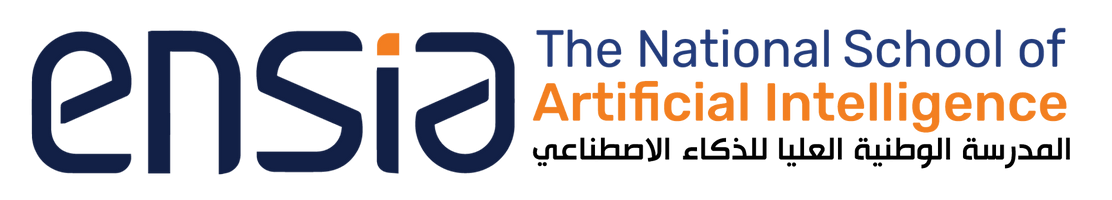

---
# **Introduction to Artificial Intelligence**

> ## Project 10 --Athlete performance and injury prediction , with finding an optimal training schedule--
*Problem Formulation , Uninformed Search and CSP*

## Overview:
The aim of this project is to design an AI-driven system that predicts athlete performance and assesses injury risk by integrating search algorithms (Greedy, A*, Uninformed Search), Constraint Satisfaction Problem (CSP) modeling, and optimization techniques (e.g., Genetic Algorithms). The system dynamically selects and applies these methods to analyze historical performance data, physiological metrics, and contextual factors, balancing performance optimization with injury risk mitigation. By framing performance prediction as an optimization task and injury risk assessment as a constraint-satisfaction problem, the algorithm generates actionable insights—such as optimal training schedules and risk alerts—tailored to individual athletes. Key challenges include minimizing prediction errors, reducing false negatives in injury detection, and ensuring resource constraints (e.g., training load, recovery time) are respected throughout the search process.

---
## **1. Problem Formulation**
---

> The problems will be explored: Training schedule planning. A corresponding Python class is provided with its core attributes and methods. This class is represented according to the standard formulation principle (5 aspects: **initial_state**, **goal_test** **State_transition_model**, **actions** and **path_cost**).

> Additionally, a `Node` class is provided to facilitate the representation of the problem through a graph architecture. A node represents a **specific state** within the given problem.

> ### Node representation

In [61]:
class Node:
    def __init__(self, position, metrics, action=None):
        self.position = position
        self.metrics = metrics.copy()
        # Store action as immutable tuple
        self.action = action if action else ("rest", (0, 0, 0, 0))  # (category, intensities)
        
    def copy(self):
        """Create a deep copy of the node"""
        return Node(
            position=self.position,
            metrics=self.metrics.copy(),
            action=self.action
        )
    @property
    def injury_risk_score(self):
        return # add the formula to calculate the risk here

    @property
    def performance_score(self):
        return # add the formula to calculate the performance here




> ### This are the considered metrics important to describe the player's state 

In [62]:
metrics = {
    # Shot-stopping metrics
    "save_percentage": 73,          # 73% saves (average for top-tier GKs)
    "goals_conceded": 4,            # 4 goals conceded in last 5 matches
    "1v1_training_score": 82,       # Strong in 1v1 drills
    "reaction_time": 180,           # 180ms (elite: 150-200ms range)
    "aerial_ball_handling_success": 78,  # 78% success in aerial claims
    "cross_claims": 12,             # 12 cross claims in 5 matches
    "jump_height": 75,              # 75cm vertical jump
    "defensive_set_piece_handling": 85, # Strong in set-piece organization

    # Distribution metrics
    "distribution_accuracy_score": 88,  # 88% pass accuracy
    "long_pass_success": 68,        # 68% successful long passes
    "distribution_training": 84,    # High training score
    "pass_completion": 86,          # 86% overall pass completion

    # Error/risk metrics
    "errors_leading_to_goals": 1,   # 1 error leading to a goal in 5 matches
    "cognitive_score": 88,          # High decision-making score
    "video_analysis_engagement": 92, # Actively engages in video analysis

    # Derived metrics (placeholders)
    "max_goals_conceded": 3,        # Worst match: conceded 3 goals
    "MaxErrors": 2,                 # Max 2 errors in a single match
    "set_piece_handling_score": 85, # Strong set-piece defense
    "clean_sheet_bonus": 2,              # 2 clean sheets in 5 matches

    # Handling metrics
    "catches": 15,                  # 15 catches in 5 matches
    "punches": 5,                   # 5 punches
    "drops": 2,                     # 2 dropped catches
    "safe_parry": 8,                # 8 safe parries
    "total_parry": 10,              # 10 total parry attempts

    # Defensive drills
    "tackles_won": 9,               # 9 tackles won
    "ground_duels_won": 65,         # 65% ground duels won
    "aerial_duels_won": 76,         # 76% aerial duels won
    "defending_drill_score": 88,    # Training performance

    # Mental/positioning
    "errors_leading_to_shots": 3,   # 3 errors leading to shots
    "defensive_shape_training_score": 83,
    "positioning_awareness_score": 89, # Strong positional IQ

    # In-game actions
    "passing_accuracy": 87,         # 87% passing accuracy
    "clearances": 18,               # 18 clearances in 5 matches
    "distribution_under_pressure": 79, # Performs under pressure
    "chances_created": 1,           # 1 assist/chance created

    # Physical metrics
    "vo2_max": 54,                  # High aerobic capacity (ml/kg/min)
    "lower_body_strength": 92,      # Leg press: 92% of position max
    "total_distance_covered": 25.3, # 25.3km over 5 matches
    "total_training_load": 435,     # Cumulative load (arbitrary units)
    "resting_heart_rate": 48,       # Bradycardia (elite fitness)
    "sleep_quality": 84,            # 84/100 sleep score
    "sprint_distance": 30,

    # Match impact
    "duels_won": 72,                # 72% of duels won
    "marking_and_tackling": 85,     # Defensive drill score
    "defensive_contributions": 22,  # 22 interceptions/blocks/clearances
    "mental_fatigue_score": 28,     # Low fatigue (0 = fresh, 100 = exhausted)
    "close_range_save_rate" : 90,         # 90% close-range saves
    "reaction_saves": 80,            # 80% reaction saves
    "long_shot_save_rate": 75,         # 75% long shot saves
    "penalty_save_rate": 30,         # 30% penalty saves
    "diving_save_rate": 85,         # 85% diving saves
    "injury_prevention": 20,
    "fatigue_score":10,

    # Attack contribution (minimal for GKs)
    "assists_per_match": 0.1,       # 0.1 assists per match
    "goals_per_match": 0.0,         # Rarely scores
    "shots_on_target_per_match": 0.2, # Occasional long kicks
    "dribble_success_percent": 40,  # 40% dribble success (rarely dribbles)
    "FinishingTest": 72,            # Penalty practice score

    # Athleticism
    "SprintSpeed": 31.5,            # 31.5 km/h top speed
    "SprintDistance": 285,          # 285m of sprints per match
    "BMI_Factor": 23.1,             # BMI 23.1 (optimal for agility)

    # Injury/load metrics
    "chronic_workload": 7.1,       # 4-week workload
    "acute_workload": 8.9,          # 1-week workload
    "days_since_last_injury": 120,  # No recent injuries
    "injury_history_count": 2,      # 2 past injuries
    "hrv": 63,                      # Heart rate variability (healthy)
    "fatigue": 24,                  # Low fatigue (0-100 scale)
    "video_analysis_score": 87,     # High engagement
    "Strength": 88                  # Overall strength index

}
    # "error_impact": "errors_leading_to_goals" / "goals_conceded" ,
    # "drops_penalty" : "drops"/"catches",
    # "safe_parry_rate" : "safe_parry" / "total_parry" ,
    # "catch_success_rate" : ["catches"] / ("catches" + "punches") *100,
metrics["safe_parry_rate"] = metrics["safe_parry"] / (metrics["total_parry"])  # Avoid division by zero
metrics["drop_penalty"] = metrics["drops"] / (metrics["catches"] + 1)  # Avoid division by zero
metrics["error_impact"] = metrics["errors_leading_to_goals"] / (metrics["goals_conceded"] + 1)  # Avoid division by zero
metrics["catch_success_rate"] = (metrics["catches"] / (metrics["catches"] + metrics["punches"])) * 100




scores = {
                # Awareness: Save Rate (50%) + Clean Sheets (30%) - Errors (20%)
                'awareness': (metrics['save_percentage'] * 0.5) + 
                            (metrics['clean_sheet_bonus'] * 0.3) - 
                            (metrics['error_impact'] * 0.2),
                
                # Catching: Success Rate (80%) - Drop Penalty (20%)
                'catching': (metrics['catch_success_rate'] * 0.8) - 
                        (metrics['drop_penalty'] * 0.2),
                
                # Parrying: Direct safe parry rate
                'parrying': metrics['safe_parry_rate'],
                
                # Reflexes: Close Range (40%) + Reaction Saves + Penalty Bonus
                'reflexes': (metrics['close_range_save_rate'] * 0.4) +
                        (metrics['reaction_saves'] * 5) +
                        (10 if metrics['penalty_save_rate'] >= 33 else 0),
                
                # Reach: Height (50%) + Long Shots (30%) + Diving (20%)
                'reach':(metrics['long_shot_save_rate'] * 0.5) +
                        (metrics['diving_save_rate'] * 0.5)

            }


new_metrics = {
    # Physical & Technical Metrics
    "total_distance": 8.5,          # Total km added in drills (weekly)
    "flexibility_score": 75,        # 75/100 (improved via mobility work)
    "sprint_speed": 32.4,           # km/h (specific to sprint training)
    "defensive_coverage": 84,       # % of defensive zones covered effectively
    "VO2_max": 57,                  # ml/kg/min (improved via RSA sprints)
    "fatigue_resistance": 88,       # 0-100 scale (high = resilient)
    "jump_power": 82,               # cm (vertical leap improvement)
    "unilateral_strength": 89,       # 0-100 score (split squat performance)
    "balance": 88,                  # 0-100 (ankle stability drills)
    "posterior_chain_strength": 91,  # 0-100 (Nordic curl strength)
    "muscle_resilience": 87,         # 0-100 (eccentric load tolerance)
    "defensive_errors": 0 ,

    # Mental/Cognitive Metrics
    "mental_fatigue": 18,           # 0-100 (lower = fresher)
    "duel_resilience": 78,          # % recovery rate after losing duels
    "decision_making": 85,          # 0-100 (tactical choices under pressure)
    "decision_speed": 165,          # ms (stimulus response time)
    "stress_level": 14,             # 0-100 (lower = calmer)
    "anticipation": 89,             # 0-100 (predicting opposition moves)
    "decision_quality": 87,         # 0-100 (effectiveness of choices)

    # Tactical Metrics
    "tactical_adaptability": 86,    # 0-100 (adjusting to 10v11 scenarios)
    "defensive_resilience": 83,     # 0-100 (sustaining defensive shape)
    "contextual_adaptability": 88,   # 0-100 (home/away performance gap)
    "stress_management": 82,        # 0-100 (handling pressure)
    "tactical_flexibility": 84,      # 0-100 (switching between deep/mid-block)
    "tactical_awareness": 91,        # 0-100 (reading the game)
    "tactical_positioning": 90,      # 0-100 (optimal clearance positioning)
    "clearance_success": 86,         # % of clearances reaching teammates
    "positional_awareness": 0,

    # Recovery Metrics
    "recovery_quality": 86,         # 0-100 (yoga/breathing impact)
    "HRV": 68,                       # Heart rate variability (higher = better)
    "TacklesWon" : 5,
    "GroundDuelsWon" : 3,
    "AerialDuelsWon" : 3,
    "DefendingDrillScore" : 80,
    "Errors" : 1,
    "ReactionTime" : 200, 
    "PositioningAwareness" : 80,
    "PassAccuracy" : 80,
    "MaxClearances" : 5 ,
    "DistributionTrainingScore" : 70,
    "ChancesCreated" : 2,
    
    
    
}



metrics = metrics | scores | new_metrics 

> ### The Problem Definition Class

In [63]:
import numpy as np
import itertools
import math
import copy
from collections import defaultdict
import json 


class  Training_Problem :
    def __init__(self, initial_state ):
        self.initial_state = initial_state
        state = initial_state



    def generate_neighbors (self , state): 


        "This function generates the neighbors of the current state by applying all possible actions and their intensities"
        if state.position == "Goalkeeper" :
            with open('Goalkeeper_actions.json', 'r') as f:
                actions = json.load(f)
        

        if state.position == "Attacker" :
            with open('Attacker_actions.json', 'r') as f:
                actions = json.load(f)

        if state.position == "Defender" :
            with open ('Defender_actions.json' , 'r') as f:
                actions = json.load(f)

                
        neighbors = []
        for action in actions.keys():
            for exercise in actions[action].keys() :
                new_state = self.transition(state , action)
                neighbors.append(new_state)

        return neighbors



    def transition(self, state, action):



        "this function applies the action and its intensities to the current state and returns the new state"

        if state.position == "Goalkeeper" :
            with open('Goalkeeper_actions.json') as f:
                actions = json.load(f)

        if state.position == "Attacker" :
            with open('Attacker_actions.json', 'r') as f:
                actions = json.load(f)

        if state.position == "Defender" :
            with open ('Defender_actions.json' , 'r') as f:
                actions = json.load(f)

                
        total_effects = defaultdict(float)
        # Get exercises for this action from predefined actions data
        exercises = actions[action].keys()
        
        for exercise in exercises:
            exercise_effects = actions[action][exercise]

            for metric in exercise_effects.keys():
                total_effects[metric] += exercise_effects[metric]  # Accumulate deltas

        # Apply changes to the NEW state's metrics
        new_state = state.copy()
        for metric in total_effects.keys():
            # Access metrics via .metrics, not state[metric]
            new_state.metrics[metric] += ((100 - state.metrics[metric]) / 100) * total_effects[metric]
        return Node(
        position=state.position,
        metrics=new_state.metrics,
        action=(action)
    )  # Return updated state







    def evaluate_performance(self , state) : 

        if not isinstance(state, Node):
            raise ValueError("Invalid state type")

        """ this function just calculates the performance score of the player based on the metrics and position 
        the performance score is calculated based on the position of the player and the metrics that are available for this position """

        def fifa_curve(raw_score, min_raw=50, max_raw=100):


            "this function applies the FIFA curve to the raw score to get the final score"


        # Ensure raw_score is within the range
        # Normalize to 0-1 range
            normalized = (raw_score - min_raw) / (max_raw - min_raw)
        # Apply logistic curve (adjust k for steeper/flatter curves)   // this function will be needed afterwards 
            k = 4  # Controls the curve steepness (FIFA uses ~3-5)
            curved = 99 / (1 + np.exp(-k * (normalized - 0.5)))
            return round(curved)

        

        if state.position == "Goalkeeper":
            # scores = {
            #     # Awareness: Save Rate (50%) + Clean Sheets (30%) - Errors (20%)
            #     'awareness': (state.metrics['save_percentage'] * 0.5) + 
            #                 (state.metrics['clean_sheet_bonus'] * 0.3) - 
            #                 (metrics['error_impact'] * 0.2),
                
            #     # Catching: Success Rate (80%) - Drop Penalty (20%)
            #     'catching': (state.metrics['catch_success_rate'] * 0.8) - 
            #             (state.metrics['drop_penalty'] * 0.2),
                
            #     # Parrying: Direct safe parry rate
            #     'parrying': state.metrics['safe_parry_rate'],
                
            #     # Reflexes: Close Range (40%) + Reaction Saves + Penalty Bonus
            #     'reflexes': (state.metrics['close_range_save_rate'] * 0.4) +
            #             (state.metrics['reaction_saves'] * 5) +
            #             (10 if state.metrics['penalty_save_rate'] >= 33 else 0),
                
            #     # Reach: Height (50%) + Long Shots (30%) + Diving (20%)
            #     'reach':(metrics['long_shot_save_rate'] * 0.5) +
            #             (metrics['diving_save_rate'] * 0.5)

            # }
                # 'overall': 0.25 * scores['awareness'] + 0.25 * scores['catching'] + 0.2 * scores['parrying'] + 0.15 * scores['reflexes'] + 0.15 * scores['reach']
            state.metrics["overall"] = 0.25 * state.metrics['awareness'] + 0.25 * state.metrics['catching'] + 0.2 * state.metrics['parrying'] + 0.15 * state.metrics['reflexes'] + 0.15 * state.metrics['reach']
            return state.metrics["overall"]


        
        elif state.position == "Defender":
            #TacklingAndDuels = 0.35 × TacklesWon + 0.25 × GroundDuelsWon + 0.2 × AerialDuelsWon + 0.2 × DefendingDrillScore
            #Positioning = 0.3 × ((1 - Errors / MaxErrors) × 100) + 0.3 × DefensiveShapeScore + 0.2 × ((1 - ReactionTime / 1000) × 100) + 0.2 × PositioningAwareness
            #Passing = 0.4 × PassAccuracy + 0.25 × (Clearances / MaxClearances × 100) + 0.2 × DistributionTrainingScore + 0.15 × (ChancesCreated × 20)
            #Physical = 0.25 × (VO2max / 75 × 100) + 0.2 × (Strength / 250 × 100) + 0.15 × (Distance / 12000 × 100) + 0.15 × (TrainingLoad / 1000 × 100) + 0.15 × (sleep_quality × 10) + 0.1 × ((80 - RestingHR) / 40 × 100)
            #DefensiveImpact = 0.3 × DuelsWon + 0.25 × MarkingTraining + 0.25 × (DefContributions / MaxDefContrib × 100) + 0.2 × ((1 - ReactionTime / 1000) × 100)
            #Overall = 0.25 × TacklingAndDuels + 0.25 × Positioning + 0.20 × DefensiveImpact + 0.15 × Physical + 0.15 × Passing
            # Calculate the metrics based on the state
            TacklingAndDuels = 0.35 * state.metrics["TacklesWon"] + 0.25 * state.metrics["GroundDuelsWon"] + 0.2 * state.metrics["AerialDuelsWon"] + 0.2 * state.metrics["DefendingDrillScore"]
            PositioningAndAwareness = 0.3 * ((1 - state.metrics["Errors"] / state.metrics["MaxErrors"]) * 100) + 0.3 * state.metrics["defensive_shape_training_score"] + 0.2 * ((1 - state.metrics["ReactionTime"] / 1000) * 100) + 0.2 * state.metrics["PositioningAwareness"]
            PassingAndBuildup = 0.4 * state.metrics["PassAccuracy"] + 0.25 * (state.metrics["clearances"] / state.metrics["MaxClearances"] * 100) + 0.2 * state.metrics["DistributionTrainingScore"] + 0.15 * (state.metrics["ChancesCreated"] * 20)
            PhysicalConditioning = 0.25 * (state.metrics["vo2_max"] / 75 * 100) + 0.2 * (state.metrics["Strength"] / 250 * 100) + 0.15 * (state.metrics["Distance"] / 12000 * 100) + 0.15 * (state.metrics["TrainingLoad"] / 1000 * 100) + 0.15 * (state.metrics["sleep_quality"] * 10) + 0.1 * ((80 - state.metrics["RestingHR"]) / 40 * 100)
            DefensiveImpact = 0.3 * state.metrics["DuelsWon"] + 0.25 * state.metrics["MarkingTraining"] + 0.25 * (state.metrics["DefContributions"] / state.metrics["MaxDefContrib"] * 100) + 0.2 * ((1 - state.metrics["ReactionTime"] / 1000) * 100)
            overall = 0.25 * TacklingAndDuels + 0.25 * PositioningAndAwareness + 0.2 * DefensiveImpact + 0.15 * PhysicalConditioning + 0.15 * PassingAndBuildup

            return {
                "TacklingAndDuels": TacklingAndDuels ,
                "PositioningAndAwareness": PositioningAndAwareness ,
                "PassingAndBuildup": PassingAndBuildup ,
                "PhysicalConditioning": PhysicalConditioning,
                "DefensiveImpact": DefensiveImpact,
                "overall": overall
            }
        

        elif state.position == "Midfielder-D":
            Defending = min(
                (state.metrics["Tackles_per_match"] * 10) +       
                (state.metrics["Clearances_per_match"] * 8) +     
                (state.metrics["Duels_won_percent"] * 0.8) +      
                (state.metrics["Total_distance_km"] * 2),         
                    100                              # Cap at 100
                            )
            
            Passing = min(
                (state.metrics["Pass_completion"] * 0.8) +        
                (state.metrics["Assists_per_match"] * 20) +       
                (state.metrics["Chances_created_per_match"] * 3), 
                100
            )


            Physicality = min(
                (state.metrics["Total_distance_km"] * 2.5) +      # 12.6 → 31.5
                (state.metrics["Sprint_distance_km"] * 1.2),      # 28.8 → 34.56
                100
            )

            Reliability = max(100 - (state.metrics["Major_errors"] * 25) , 50) * 0.05

            overall = fifa_curve((Defending * 0.4) + (Passing * 0.2) + (Physicality * 0.2) + (Reliability * 0.2))

            return {
                "Defending": Defending,
                "Passing": Passing,
                "Physicality": Physicality,
                "Reliability": Reliability,
                "overall": overall
            }
        elif state.position == "Midfielder-A":
            Attacking = min(
                (state.metrics["Goals_per_match"] * 90) +         # 0.28 → 25.2
                (state.metrics["Assists_per_match"] * 50) +       # 0.6 → 30
                (state.metrics["Shots_on_target_per_match"] * 15),# 0.8 → 12
                100
            )

            Passing = min(
                (state.metrics["Pass_completion"] * 0.7) +        # 85% → 59.5
                (state.metrics["Chances_created_per_match"] * 12),# 2.4 → 28.8
                100
            )

            Dribbling = min(
                (state.metrics["Dribble_success_percent"] * 0.9) + # 70% → 63
                (state.metrics["Duels_won_percent"] * 0.4),        # 70% → 28
                100
            )

            Mobility = (state.metrics["Total_distance_km"] / 15) * 100
            
            overall = fifa_curve((Attacking * 0.3) + (Passing * 0.4) + (Dribbling * 0.2) + (Mobility * 0.1))

            return {
                "Attacking": Attacking,
                "Passing": Passing,
                "Dribbling": Dribbling,
                "Mobility": Mobility,
                "overall": overall
            }
        elif state.position == "Striker":
            #Shooting =Shooting = 0.5 × (Goals × 20) + 0.25 × (ShotsOnTarget × 10) + 0.2 × FinishingTest + 0.05 × DribbleSuccess
            #Pace = 0.6 × (SprintSpeed × 10) + 0.25 × (SprintDistance / 1000 × 100) + 0.15 × (TotalDistance / 12000 × 100)
            #Dribbling = 0.5 × DribbleSuccess + 0.3 × DuelsWon + 0.2 × ((1 - ReactionTime / 1000) × 100)
            #Passing = 0.4 × (Assists × 25) + 0.35 × PassCompletion + 0.25 × (ChancesCreated × 20)
            #Physical = 0.25 × (VO2max / 75 × 100) + 0.2 × (Strength / 250 × 100) + 0.2 × (TrainingLoad / 1000 × 100) + 0.15 × (sleep_quality × 10) + 0.1 × ((80 - RestingHR) / 40 × 100) + 0.1 × BMI_Factor
            #Overall = 0.30 × Shooting + 0.20 × Pace + 0.20 × Dribbling + 0.15 × Physical + 0.15 × Passing
            Shooting = 0.5 * (state.metrics["Goals"] * 20) + 0.25 * (state.metrics["ShotsOnTarget"] * 10) + 0.2 * state.metrics["FinishingTest"] + 0.05 * state.metrics["DribbleSuccess"]
            Pace = 0.6 * (state.metrics["SprintSpeed"] * 10) + 0.25 * (state.metrics["SprintDistance"] / 1000 * 100) + 0.15 * (state.metrics["TotalDistance"] / 12000 * 100)
            Dribbling = 0.5 * state.metrics["DribbleSuccess"] + 0.3 * state.metrics["DuelsWon"] + 0.2 * ((1 - state.metrics["ReactionTime"] / 1000) * 100)
            Passing = 0.4 * (state.metrics["Assists"] * 25) + 0.35 * state.metrics["PassCompletion"] + 0.25 * (state.metrics["ChancesCreated"] * 20)
            Physical = 0.25 * (state.metrics["vo2_max"] / 75 * 100) + 0.2 * (state.metrics["Strength"] / 250 * 100) + 0.2 * (state.metrics["TrainingLoad"] / 1000 * 100) + 0.15 * (state.metrics["sleep_quality"] * 10) + 0.1 * ((80 - state.metrics["RestingHR"]) / 40 * 100) + 0.1 * state.metrics["BMI_Factor"]
            overall = 0.3 * Shooting + 0.2 * Pace + 0.2 * Dribbling + 0.15 * Physical + 0.15 * Passing
            return {
                "Shooting": Shooting,
                "Pace": Pace,
                "Dribbling": Dribbling,
                "Passing": Passing,
                "Physical": Physical,
                "overall": overall
            }
        



    def evaluate_injury_risk(self , state) :

        return (  
        (state.metrics ["acute_workload"] * 0.4) +  
        (state.metrics["chronic_workload"] * 0.3) +  
        (1 / (state.metrics["days_since_last_injury"] + 1) * 0.3)  # Inverse relationship  
    )  





> ### The BFS Algorithm Implementation Class

In [64]:
from collections import deque
class BFS :
    def __init__(self , initial_state):
        self.initial_state = initial_state
        self.state = initial_state
        self.problem = Training_Problem(initial_state)
        self.path = []



    def search(self):
        initial_state = self.state
        initial_performance = self.problem.evaluate_performance(initial_state)
        best_state = initial_state
        best_performance = initial_performance
        best_path = []
        
        # Initialize queue with (state, path)
        queue = deque()
        queue.append((initial_state, []))
        visited = set()
        visited.add(initial_state)
        
        while queue:
            current_state, current_path = queue.popleft()
            
            # Update best state tracking
            current_performance = self.problem.evaluate_performance(current_state)
            if current_performance > best_performance:
                best_state = current_state
                best_performance = current_performance
                best_path = current_path.copy()
                print(f"New best: {current_performance} with path {current_path}")
            
            # Goal check
            if current_performance >= initial_performance * 1.05:
                self.state = current_state
                self.path = current_path
                print(f"Performance improved by 5% to {current_performance}, halting.")
                return current_state
            
            # Generate and process neighbors
            neighbors = self.problem.generate_neighbors(current_state)
            for neighbor in neighbors:
                if neighbor not in visited:
                    visited.add(neighbor)
                    new_path = current_path + [neighbor.action]
                    queue.append((neighbor, new_path))
        
        # If goal not found, return best state encountered
        self.state = best_state
        self.path = best_path
        return best_state
            

> ### The Greedy Search Algorithm Implementation Class

In [65]:
class Greedy_search :
    def __init__(self , initial_state):
        self.initial_state = initial_state
        self.state = initial_state
        self.problem = Training_Problem(initial_state)
        self.path = []


    def search(self):
        current_state = self.state
        best_score = 0.0
        i = 0
        for i in range(30):
            neighbors = self.problem.generate_neighbors(current_state)
            best_neighbor = None
            best_score = float('-inf')
            i = i + 1
            for neighbor in neighbors:
                score = self.heuristic(neighbor)
                if score > best_score:
                    best_score = score
                    best_neighbor = neighbor
                    print(f"{i}  Best Neighbor: {best_neighbor.action} with score: {best_score} injury risk: {self.problem.evaluate_injury_risk(best_neighbor)} performance: {self.problem.evaluate_performance(best_neighbor)}")
            current_state = best_neighbor
            self.path.append(current_state.action)
        self.state = current_state
        return current_state


    def heuristic(self, state):
        """Balances injury risk and performance gain with realistic weights."""
        injury = self.problem.evaluate_injury_risk(state)
        initial_perf = self.problem.evaluate_performance(self.initial_state)
        current_perf = self.problem.evaluate_performance(state)
        performance_gain = current_perf - initial_perf
        
        # Injury penalty (quadratic scaling for high risk)
        injury_penalty = 0
        if injury < 10:
            injury_penalty = -injury
        elif 10 <= injury < 30:
            injury_penalty = -injury*2  # Moderate penalty for moderate risk
        else:  # 30%+ injury risk
            injury_penalty = -injury *2  # Strong penalty for high risk
        
        # Performance reward (diminishing returns)
        performance_reward = 0
        if performance_gain > 0:
            performance_reward = performance_gain*50  # Log scale
        
        # Combine with weights
        return injury_penalty + performance_reward


    def get_path(self):
        return self.path
    def get_final_state(self):
        return self.state
    def get_initial_metrics(self):
        return self.initial_state.metrics
    def get_final_performance(self):
        return self.problem.evaluate_performance(self.state)
    def get_final_injury_risk(self):
        return self.problem.evaluate_injury_risk(self.state)
    def get_final_metrics(self):
        return self.state.metrics



> ### The A* Implementation Class

In [66]:
class Astar_search :
  pass 

> ### The Genetic Algorithm Implementaion Class

Starting genetic algorithm optimization...
Attempting to parse actions dictionary...
Successfully parsed actions dictionary!
Initializing optimizer...
Running genetic algorithm...

=== OPTIMIZED WEEKLY TRAINING SCHEDULE ===
(Balancing performance gains with injury risk)
Day | Activity          | Exercise               | Intensity | Duration
-----------------------------------------------------------------
Monday   | Training (Functional_Training) | Aerial_Clearances    | 5/5     | 30 min
Tuesday  | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 50 min
Wednesday | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 81 min
Thursday | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 56 min
Friday   | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 85 min
Saturday | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 33 min
Sunday   | Training (Defensive_Drills) | 1v1_Defending        | 5/5     | 35 min

=== SCHEDULE METRIC

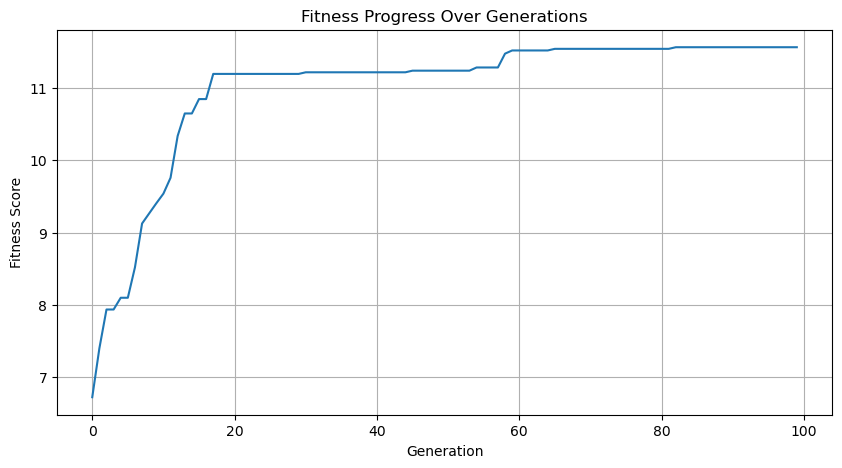

Optimization complete!


In [67]:

import random
import json
import ast
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np  # You forgot to import numpy! Needed for np.argsort
import copy  # Needed for deep copying schedules in mutation

# Genetic Algorithm class for optimizing athlete training schedules
class GeneticAthleteOptimizer:
    def __init__(self, athlete_metrics, actions, position):
        """
        Initialize the optimizer with athlete's metrics, available actions, and position-specific data.
        """
        self.athlete = athlete_metrics  # Dictionary of athlete stats (e.g., injury history, chronic workload)
        self.actions = actions[position]  # Actions are split by player position (Defender, Midfielder, etc.)
        self.position = position

        # Genetic Algorithm Hyperparameters
        self.pop_size = 50          # Number of schedules in each generation
        self.generations = 100      # How many generations to run evolution
        self.mutation_rate = 0.15   # 15% chance to mutate each gene (day)
        self.elitism = 0.1          # Top 10% of schedules are carried forward unchanged

        # Fitness calculation weights:
        # These control how much we care about each part (performance, injury, constraint violations)
        self.weights = {
            'performance': 0.7,    # Higher performance = good
            'injury_risk': -0.3,   # Higher injury risk = bad (so negative weight)
            'constraints': -0.5    # Breaking training rules = bad
        }

    def generate_individual(self):
        """
        Generate a random 7-day schedule for an athlete.
        Each day is either 'train' or 'recover' randomly.
        """
        schedule = []
        categories = list(self.actions.keys())  # Training categories like Strength, Speed, etc.

        for day in range(7):  # For each day of the week
            if random.random() < 0.7:  # 70% chance to have a training session
                category = random.choice(categories)  # Random category
                exercise = random.choice(list(self.actions[category].keys()))  # Random exercise in that category
                intensity = random.randint(1, 5)  # Training intensity from 1 to 5
                duration = random.randint(30, 120)  # Duration between 30 to 120 minutes
                schedule.append(('train', category, exercise, intensity, duration))
            else:
                schedule.append(('recover', None, None, 0, 0))  # Recovery day

        return schedule

    def calculate_injury_risk(self, schedule):
        """
        Calculate the injury risk based on acute load, chronic workload, recovery days, etc.
        """
        # Acute Load = total duration of training this week
        acute_load = sum(duration for (t, _, _, _, duration) in schedule if t == 'train')
        chronic_load = self.athlete.get('chronic_workload', 300)  # Past month average workload (default 300)

        acwr = acute_load / chronic_load if chronic_load > 0 else 1.0  # Acute:Chronic Workload Ratio

        # Injury risk formula
        risk = (
            0.5 * min(max(acwr, 0.8), 1.5) +  # ACWR heavily weighted
            0.3 * (sum(intensity for (t, _, _, intensity, _) in schedule if t == 'train') / 35) +  # Training intensity
            0.1 * (4 - sum(1 for day in schedule if day[0] == 'recover')) +  # Few recovery days = more risk
            0.1 * (self.athlete['injury_history'] / 5)  # Athlete's injury history matters too
        )
        return min(max(risk, 0), 1.0)  # Clamp between 0 and 1

    def predict_performance(self, schedule):
        """
        Predict a performance score based on the training exercises completed.
        """
        deltas = defaultdict(float)  # How much each metric (like tackles, passing) improved

        for day in schedule:
            if day[0] == 'train':
                _, category, exercise, intensity, _ = day
                effects = self.actions[category][exercise].get(intensity, {})  # Effect of this exercise

                for metric, delta in effects.items():
                    deltas[metric] += delta

        # Calculate a total performance score
        performance = 0
        for metric, delta in deltas.items():
            # Different positions value different metrics more
            if metric in ['tackles_won', 'clearances'] and self.position == 'Defender':
                performance += delta * 0.3
            elif metric == 'passing_accuracy':
                performance += delta * 0.2
            # You can add more metrics for midfielders, attackers, etc.

        return performance

    def check_constraints(self, schedule):
        """
        Check if the schedule violates important constraints:
        - Must have at least 2 recovery days
        - Can't train more than 3 days in a row
        """
        violations = 0

        # 1. Check number of recovery days
        recovery_days = sum(1 for day in schedule if day[0] == 'recover')
        if recovery_days < 2:
            violations += (2 - recovery_days) * 0.5  # Penalty if not enough rest

        # 2. Check for too many consecutive training days
        consecutive_train = 0
        max_consecutive = 0
        for day in schedule:
            if day[0] == 'train':
                consecutive_train += 1
                max_consecutive = max(max_consecutive, consecutive_train)
            else:
                consecutive_train = 0  # Reset on recovery day
        if max_consecutive > 3:
            violations += (max_consecutive - 3) * 0.3  # Penalty for too much back-to-back training

        return violations

    def fitness(self, schedule):
        """
        Calculate a fitness score for the schedule.
        Higher fitness = better schedule.
        """
        injury_risk = self.calculate_injury_risk(schedule)
        performance = self.predict_performance(schedule)
        constraints = self.check_constraints(schedule)

        # Weighted sum of all parts
        return (
            self.weights['performance'] * performance +
            self.weights['injury_risk'] * injury_risk +
            self.weights['constraints'] * constraints
        )

    def crossover(self, parent1, parent2):
        """
        Combine two parents to create a new child schedule.
        For each day, randomly take from parent1 or parent2.
        """
        child = []
        for g1, g2 in zip(parent1, parent2):
            child.append(g1 if random.random() < 0.5 else g2)
        return child

    def mutate(self, schedule):
        """
        Apply random changes (mutations) to a schedule.
        Makes the population more diverse.
        """
        new_schedule = copy.deepcopy(schedule)  # Make a deep copy so we don't affect the original

        for i in range(len(new_schedule)):
            if random.random() < self.mutation_rate:
                mutation_type = random.choice([
                    'change_exercise',
                    'change_intensity',
                    'change_duration',
                    'swap_days',
                    'add_recovery'
                ])

                if mutation_type == 'change_exercise':
                    category = random.choice(list(self.actions.keys()))
                    exercise = random.choice(list(self.actions[category].keys()))
                    new_schedule[i] = ('train', category, exercise, new_schedule[i][3], new_schedule[i][4])

                elif mutation_type == 'change_intensity':
                    new_intensity = min(max(new_schedule[i][3] + random.choice([-2, -1, 1, 2]), 1), 5)
                    new_schedule[i] = (*new_schedule[i][:3], new_intensity, new_schedule[i][4])

                elif mutation_type == 'add_recovery' and new_schedule[i][0] == 'train':
                    new_schedule[i] = ('recover', None, None, 0, 0)

                # (Swap days and change duration not fully implemented yet)

        return new_schedule

    def evolve(self):
        """
        Run the Genetic Algorithm to evolve better schedules.
        """
        # 1. Start with random population
        population = [self.generate_individual() for _ in range(self.pop_size)]
        best_fitness = -float('inf')  # Best score so far
        best_schedule = None
        fitness_history = []  # Track fitness over generations

        for generation in range(self.generations):
            # 2. Calculate fitness for all individuals
            fitness_scores = [self.fitness(ind) for ind in population]

            # 3. Update best schedule found
            current_best = max(fitness_scores)
            if current_best > best_fitness:
                best_fitness = current_best
                best_schedule = population[fitness_scores.index(current_best)]

            fitness_history.append(best_fitness)

            # 4. Select parents
            elite_size = max(1, int(self.elitism * self.pop_size))
            elite_indices = np.argsort(fitness_scores)[-elite_size:]  # Best individuals
            elite = [population[i] for i in elite_indices]

            parents = []
            for _ in range(self.pop_size - elite_size):
                candidates = random.sample(range(len(population)), min(3, len(population)))
                winner = max(candidates, key=lambda x: fitness_scores[x])
                parents.append(population[winner])

            # 5. Create new population with crossover + mutation
            offspring = []
            for i in range(0, len(parents), 2):
                if i + 1 < len(parents):
                    child1 = self.crossover(parents[i], parents[i+1])
                    child2 = self.crossover(parents[i+1], parents[i])
                    offspring.append(self.mutate(child1))
                    offspring.append(self.mutate(child2))
                else:
                    offspring.append(self.mutate(parents[i]))

            # 6. New generation
            population = elite + offspring

        # After all generations, return the best schedule and fitness history
        return best_schedule, fitness_history

    def visualize_progress(self):
        """Visualize fitness progress over generations."""
        plt.figure(figsize=(10, 6))
        plt.plot(self.best_fitness_history, label='Best Fitness')
        plt.plot(self.average_fitness_history, label='Average Fitness')
        plt.plot(self.worst_fitness_history, label='Worst Fitness')
        plt.title('Fitness Progress Over Generations')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.legend()
        plt.grid(True)
        plt.show()










def run_genetic():
    # Example athlete metrics
    athlete_metrics = {
        'position': 'Defender',
        'chronic_workload': 300,
        'injury_history': 1,
        'current_fatigue': 4,
        'recovery_index': 6
    }

    try:
        # Load actions from file
        with open('defender_actions_realistic.txt', 'r') as f:
            content = f.read()
            # Find where the dictionary starts and ends
            dict_start = content.find('{')
            dict_end = content.rfind('}') + 1
            dict_str = content[dict_start:dict_end]

            print("Attempting to parse actions dictionary...")
            actions = ast.literal_eval(dict_str)
            print("Successfully parsed actions dictionary!")

            # Verify we have Defender data
            if 'Defender' not in actions:
                print("Error: 'Defender' key not found in actions dictionary")
                return

    except Exception as e:
        print(f"Error loading actions file: {e}")
        return

    # Initialize the optimizer
    print("Initializing optimizer...")
    optimizer = GeneticAthleteOptimizer(athlete_metrics, actions, position='Defender')

 # Run the genetic algorithm
    print("Running genetic algorithm...")
    best_schedule, fitness_history = optimizer.evolve()

    if not best_schedule:
        print("Error: No schedule was generated")
        return

    # Print results
    print("\n=== OPTIMIZED WEEKLY TRAINING SCHEDULE ===")
    print("(Balancing performance gains with injury risk)")
    print("Day | Activity          | Exercise               | Intensity | Duration")
    print("-" * 65)

    day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    for i, day in enumerate(best_schedule):
        if day[0] == 'train':
            _, category, exercise, intensity, duration = day
            print(f"{day_names[i]:<8} | Training ({category:<8}) | {exercise:<20} | {intensity}/5     | {duration} min")
        else:
            print(f"{day_names[i]:<8} | Recovery Day         | -                    | -        | -")

    # Calculate metrics
    perf_score = optimizer.predict_performance(best_schedule)
    injury_risk = optimizer.calculate_injury_risk(best_schedule)
    constraints = optimizer.check_constraints(best_schedule)

    print("\n=== SCHEDULE METRICS ===")
    print(f"Predicted Performance Gain: {perf_score:.2f} (higher is better)")
    print(f"Injury Risk Score: {injury_risk:.2f}/1.0 (lower is better)")
    print(f"Constraint Violations: {constraints:.2f} (0 is perfect)")

    # Show fitness progression
    print("\n=== GENETIC ALGORITHM PROGRESS ===")
    print(f"Initial Fitness: {fitness_history[0]:.2f}")
    print(f"Final Fitness: {fitness_history[-1]:.2f}")
    print(f"Improvement: {(fitness_history[-1] - fitness_history[0])/abs(fitness_history[0])*100:.1f}%")

    # Plot fitness over generations
    plt.figure(figsize=(10, 5))
    plt.plot(fitness_history)
    plt.title('Fitness Progress Over Generations')
    plt.xlabel('Generation')
    plt.ylabel('Fitness Score')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    print("Starting genetic algorithm optimization...")
    run_genetic()
    print("Optimization complete!")
    


> ### The CSP Implementaion Class

In [68]:
import json
import itertools
import heapq
from collections import defaultdict
from copy import copy
import time

# Load actions from file
with open("defender_actions_realistic.txt") as f:
    actions_data = f.read()
actions = eval(actions_data)["Defender"]  # If you're sure the data is safe; otherwise use json

# Extract all training sessions
def get_all_sessions(actions):
    sessions = []
    for category in actions:
        for subcategory in actions[category]:
            for level in actions[category][subcategory]:
                sessions.append((category, subcategory, level))
    return sessions

# Get the effects of a session
def get_session_effect(session, actions):
    category, subcategory, level = session
    return actions[category][subcategory][level]

# Scoring function
def session_score(effects):
    return (
        effects.get("tackles_won", 0)
        + effects.get("clearances", 0)
        + effects.get("passing_accuracy", 0)
        + effects.get("duels_won_percent", 0)
        - 2 * effects.get("errors_leading_to_shots_goals", 0)
    )

# Fatigue cost function
def session_fatigue(effects):
    return (
        effects.get("mental_fatigue", 0)
        + effects.get("training_load.session_intensity", 0)
    )

# Create possible session plans for a day (0, 1, or 2 sessions)
def generate_domain(sessions):
    domain = [()]  # rest day
    domain += [(s,) for s in sessions]
    domain += list(itertools.combinations(sessions, 2))
    return domain

# Evaluate full day plan
def evaluate_day(plan, actions):
    total_score = 0
    total_fatigue = 0
    for session in plan:
        effects = get_session_effect(session, actions)
        total_score += session_score(effects)
        total_fatigue += session_fatigue(effects)
    return total_score, total_fatigue

# CSP Optimizer Class
class OptimizedTrainingCSP:
    def __init__(self, variables, domains, max_fatigue=45):
        self.variables = variables
        self.domains = domains
        self.max_fatigue = max_fatigue
        self.best_solution = None
        self.best_score = -1

    def solve(self, timeout=30):
        start_time = time.time()
        counter = 0
        queue = []

        initial_state = {
            'assignment': {},
            'remaining': set(self.variables),
            'total_score': 0,
            'total_fatigue': 0,
            'categories': set()
        }
        heapq.heappush(queue, (-initial_state['total_score'], counter, initial_state))
        counter += 1

        while queue and (time.time() - start_time) < timeout:
            _, _, current = heapq.heappop(queue)

            if len(current['assignment']) == len(self.variables):
                if len(current['categories']) >= 3:
                    self.best_solution = current['assignment']
                    self.best_score = current['total_score']
                continue

            var = min(current['remaining'], key=lambda v: len(self.domains[v]))

            for value in self.domains[var]:
                new_assignment = dict(current['assignment'])
                new_assignment[var] = value

                day_score, day_fatigue = evaluate_day(value, actions)
                new_total_fatigue = current['total_fatigue'] + day_fatigue

                if new_total_fatigue > self.max_fatigue:
                    continue

                new_total_score = current['total_score'] + day_score
                new_categories = set(current['categories'])
                for session in value:
                    new_categories.add(session[0])

                new_state = {
                    'assignment': new_assignment,
                    'remaining': current['remaining'] - {var},
                    'total_score': new_total_score,
                    'total_fatigue': new_total_fatigue,
                    'categories': new_categories
                }

                heapq.heappush(queue, (-new_total_score, counter, new_state))
                counter += 1

        return self.best_solution

# Main execution
all_sessions = get_all_sessions(actions)
days = [f"Day{i}" for i in range(1, 8)]
domains = {day: generate_domain(all_sessions) for day in days}

csp = OptimizedTrainingCSP(days, domains, max_fatigue=45)
solution = csp.solve(timeout=30)

# Output results
output = ""
if solution:
    total_score = 0
    total_fatigue = 0
    for day in days:
        plan = solution[day]
        score, fatigue = evaluate_day(plan, actions)
        total_score += score
        total_fatigue += fatigue
        output += f"{day}:\n"
        for session in plan:
            output += f"  - {session[1]} (Level {session[2]}) in {session[0]}\n"
        output += f"    Score: {score:.2f}, Fatigue: {fatigue:.2f}\n"
    output += f"\nTotal Score: {total_score:.2f}\n"
    output += f"Total Fatigue: {total_fatigue:.2f}"
else:
    output = "No solution found within time limit."

print(output)

KeyboardInterrupt: 

> ### THIS SECTION IS JUST FOR TESTING , YOU CAN IGNORE IT 

In [69]:
player = Node(
    position="Goalkeeper",
    metrics=metrics.copy(),  # Your metrics dict
    action=None
)

problem = Training_Problem(player)
search = BFS(player)

final_state = search.search()
print("Final State: ", final_state)
# print("Final Performance: ", search.get_final_performance())
# print("Final Injury Risk: ", search.get_final_injury_risk())
# print("Initial Metrics: ", search.get_initial_metrics())
# print("Final Metrics: ", search.get_final_metrics())
print("Path: ", search.get_path())
# state = Node("Goalkeeper", metrics )
# problem = Training_Problem(state)


New best: 102.12642625 with path ['Aerial Dominance']
New best: 102.43209019 with path ['Aerial Dominance', 'Aerial Dominance']


KeyboardInterrupt: 